In [1]:
import numpy as np 
from cobra.io import read_sbml_model
from cameo.strain_design.deterministic.flux_variability_based import FSEOF
from cobra import Reaction, Metabolite
from cameo.strain_design.heuristic.evolutionary_based import OptGene
from cameo.strain_design.deterministic.linear_programming import OptKnock
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import matplotlib.pyplot as plt

# path for google drive
mixo = read_sbml_model('iJN678mod.xml')

Restricted license - for non-production use only - expires 2024-10-28


# Flux scanning based on enforced objective flux

In following part we aim to identify gene amplification targets, therefore we used Flux scanning based on enforced objective flux. This method allows to identifiy fluxes, which increase when the hydrogen production is enforced to be a specific value. In the folllowing step the hyrdogen production will be elevated stepwise and it will be determined which fluxes either decrease or increase significantelly.

In [2]:
fseof = FSEOF(mixo)
result = fseof.run(target=mixo.reactions.EX_sql_e)
df= result.data_frame

In [3]:
# creating a dataframe with all changing fluxes
# sorting the dataframe
df= df.sort_values([1], ascending = False)

# removing genes from dataframe 
#removed_zero = (df != 0.000000).all(axis=1)
#df = df.loc[removed_zero]

In [4]:
df.head(15)

,1,2,3,4,5,6,7,8,9,10
PGI,0.841501,0.833001,0.824501,0.816001,0.807501,0.799001,0.790501,0.782001,0.773501,0.765001
PYK,0.789121,0.781150,0.773179,0.765208,0.757237,0.749266,0.741295,0.733324,0.725353,0.717382
G6PBDH,0.775456,0.767623,0.759790,0.751958,0.744125,0.736292,0.728459,0.720626,0.712793,0.704960
IPDPS_syn,0.635396,0.628978,0.622560,0.616141,0.609723,0.603305,0.596887,0.590469,0.584051,0.577633
NDPK3,0.635396,0.628978,0.622560,0.616141,0.609723,0.603305,0.596887,0.590469,0.584051,0.577633
FBA,0.583016,0.577127,0.571237,0.565348,0.559459,0.553570,0.547681,0.541792,0.535903,0.530014
PFK,0.583016,0.577127,0.571237,0.565348,0.559459,0.553570,0.547681,0.541792,0.535903,0.530014
TALA,0.258485,0.255874,0.253263,0.250653,0.248042,0.245431,0.242820,0.240209,0.237598,0.234987
IPDDI,0.211799,0.209659,0.207520,0.205380,0.203241,0.201102,0.198962,0.196823,0.194684,0.192544
EX_sql_e,0.105899,0.104830,0.103760,0.102690,0.101621,0.100551,0.099481,0.098411,0.097342,0.096272


Changing Fluxes under increasing Hydrogen production.

Text(0.5, 1.0, 'Flux scanning based on Enforced Objective Flux - EX_h2_e')

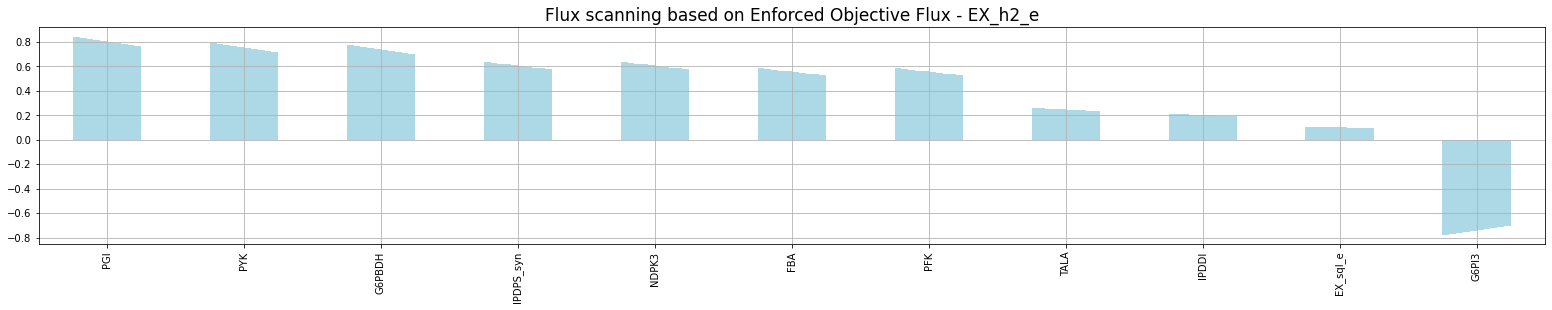

In [5]:
fig = df.plot(legend=None, kind='bar', color={'lightblue'}, figsize=(27, 4), grid =True);
fig.set_title('Flux scanning based on Enforced Objective Flux - EX_h2_e', size=17)

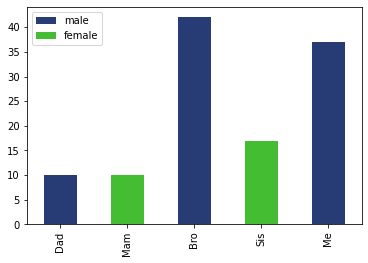

In [6]:
from matplotlib.patches import Patch
plotdata = pd.DataFrame({
    "pies": [10, 10, 42, 17, 37], 
    "gender": ["male", "female", "male", "female", "male"]
    }, 
    index=["Dad", "Mam", "Bro", "Sis", "Me"]
)
colours = {"male": "#273c75", "female": "#44bd32"}
plotdata['pies'].plot(
        kind="bar", color=plotdata['gender'].replace(colours)
).legend(
    [
        Patch(facecolor=colours['male']),
        Patch(facecolor=colours['female'])
    ], ["male", "female"]
)


Since there lot of changing reactions, we want to estimate which fluxes change over 50% (between 1 and 10).

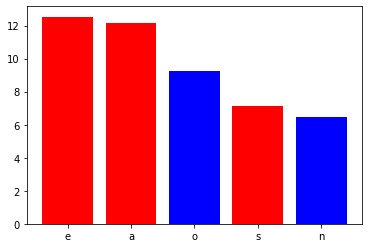

['r', 'r', 'b', 'r', 'b']

In [7]:
import pandas as pd
import matplotlib.pyplot as plt


data = {'kp': [12.534045, 12.167107, 9.238939, 7.103866, 6.470274]}
df = pd.DataFrame(data, columns=['kp'], index=['e','a','o','s','n'])

left_side  = [l for l in 'qwertasdfgzxcvb']
right_side = [l for l in 'yuiophjklñnm,.-'] 

color_list = ['r' if letter in left_side else 'b' for letter in df.index]

plt.bar(df.index, df['kp'], color=color_list)

plt.show()
color_list

In [8]:
df['rel_range'] = df.max(axis=1) /df.min(axis=1)

In [9]:
# calculating the relative change of fluxes 
df['rel_change'] = df[10]/df[1] 

KeyError: 10

In [ ]:
# identifying reactions where the flux increases more than 50%
tr_df = df.loc[df['rel_change'] > 1.5]

In [ ]:
tr_df

In [ ]:
tr_df = tr_df.drop(['rel_change','rel_range'], axis=1)
fig = tr_df.T.plot(cmap="Set2",figsize=(10, 8), grid =True, linewidth=3);
fig.set_ylabel('Flux')
fig.set_title('Reaction with a change in Flux over 50%', size=15)

Additonally we want to know whether specific reactions vary over the stepwise increasing hydrogen production. 

In [ ]:
varydf= df.loc[((df['rel_range']-df['rel_change']) <= -1) | ((df['rel_range']-df['rel_change']) >= 1)]

In [ ]:
varydf = varydf.drop(['rel_change','rel_range'], axis=1)
fig = varydf.T.plot(cmap="Set2",figsize=(10, 8), grid =True, linewidth=3);
fig.set_ylabel('Flux')
fig.set_title('Varying fluxes under Hydrogen Production', size=15)

## Dict of Potential Target genes

In [ ]:
# for overexpression only reactions with increasing fluxes 
genes_df = df.loc[df['rel_change'] > 1.3]
genes_df = genes_df.loc[genes_df[10] > 0]
arr= genes_df.index.values
# list of reactions
reactions= list(arr)

In [ ]:
# creating dict with reaction names and genes
target_genes=dict()
for elem in reactions:
    if auto.reactions.get_by_id(elem).gene_reaction_rule is not None:
      target_genes[auto.reactions.get_by_id(elem).name]= auto.reactions.get_by_id(elem).gene_reaction_rule

In [ ]:
target_genes

In [ ]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


def plot_colortable(colors, sort_colors=True, emptycols=0):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(color))),
                         name)
                        for name, color in colors.items())
        names = [name for hsv, name in by_hsv]
    else:
        names = list(colors)

    n = len(names)
    ncols = 4 - emptycols
    nrows = n // ncols + int(n % ncols > 0)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + 2 * margin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-margin)/height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig

In [ ]:
plot_colortable(mcolors.CSS4_COLORS)
plt.show()

### Additional overexpression

In [ ]:
fseof = FSEOF(modelM)
sol=fseof.run(target=modelM.reactions.EX_sql_e)
df=sol.data_frame

In [ ]:
df= df.sort_values([1], ascending = False)

In [ ]:
fig = df.plot(legend=None, kind='bar', color={'lightblue'}, figsize=(27, 4), grid =True);
fig.set_title('Flux scanning based on Enforced Objective Flux - EX_h2_e', size=17)

In [ ]:

modelMVA.reactions.get_by_id('DM_sql_c')

In [ ]:
fseof = FSEOF(modelMVA)
sol=fseof.run(target=modelMVA.reactions.DM_sql_c)
df=sol.data_frame

In [ ]:
df= df.sort_values([1], ascending = False)

In [ ]:
fig = df.plot(legend=None, kind='bar', color={'lightblue'}, figsize=(27, 4), grid =True);
fig.set_title('Flux scanning based on Enforced Objective Flux - EX_h2_e', size=17)

In [ ]:
fig = df.plot(legend=None, kind='bar', color={'lightblue'}, figsize=(27, 4), grid =True);
fig.set_title('Flux scanning based on Enforced Objective Flux - EX_h2_e', size=17)